In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv


In [3]:
import pandas as pd
import random

In [4]:
sample_frac = 0.01

In [5]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)

In [6]:
df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv',
                 usecols=selected_cols, 
                 dtype=dtypes, 
                 parse_dates=['pickup_datetime'], 
                 skiprows=skip_row)

In [7]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766963,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740142,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0


In [8]:
test_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv', 
                      dtype=dtypes, 
                      parse_dates=['pickup_datetime'])

In [9]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float64            
 6   passenger_count    552450 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 19.0 MB


In [11]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934257,1.684983
std,9.811924,11.618246,8.061114,12.074346,9.255058,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733988,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753102,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768060,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403027,208.000000


In [12]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [14]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [15]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [18]:
len(train_df), len(val_df)

(441960, 110490)

In [19]:
train_df = train_df.dropna()
val_df = val_df.dropna()

In [20]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [21]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [22]:
target_col = 'fare_amount'

In [23]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4.0
360070,-73.993805,40.724579,-73.993805,40.724577,1.0
372609,-73.959160,40.780750,-73.969116,40.761231,1.0
550895,-73.952187,40.783951,-73.978645,40.772603,1.0
444151,-73.977112,40.746834,-73.991104,40.750403,2.0
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763167,1.0
259178,-73.972656,40.764042,-74.013176,40.707841,2.0
365838,-73.991982,40.749767,-73.989845,40.720552,3.0
131932,-73.969055,40.761398,-73.990814,40.751327,1.0


In [24]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

In [25]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]
val_inputs
val_targets

15971     14.000000
149839     6.500000
515867    49.570000
90307     49.700001
287032     8.500000
            ...    
467556     6.100000
19482      7.300000
186063     4.500000
382260    32.900002
18838     11.500000
Name: fare_amount, Length: 110490, dtype: float32

In [26]:
test_inputs = test_df[input_cols]
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [27]:
import numpy as np

class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [28]:
mean_model = MeanRegressor()
mean_model.fit(train_inputs, train_targets)
mean_model.mean

11.354714

In [29]:
train_preds = mean_model.predict(train_inputs)
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [30]:
val_preds = mean_model.predict(val_inputs)
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [31]:
from sklearn.metrics import mean_squared_error
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
train_rmse

9.789782

In [32]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

9.899954

In [33]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(train_inputs, train_targets)
train_preds = linreg_model.predict(train_inputs)
train_preds

array([11.54623682, 11.28460949, 11.28413941, ..., 11.45891673,
       11.28428005, 11.28444733])

In [34]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([11.28432795, 11.28449549, 11.28478054, ..., 11.80449938,
       11.28443343, 11.28413233])

In [35]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
train_rmse

9.78863266989743

In [36]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

9.898088220645102

In [37]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [38]:
test_preds = linreg_model.predict(test_inputs)

In [39]:
submission_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv')
submission_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [40]:
def generate_submission(test_preds, fname):
    sub_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)

In [41]:
generate_submission(test_preds, 'linreg_submission.csv')

In [42]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [43]:
add_dateparts(train_df, 'pickup_datetime')
add_dateparts(val_df, 'pickup_datetime')
add_dateparts(test_df, 'pickup_datetime')
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724577,1.0,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761231,1.0,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772603,1.0,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750403,2.0,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763167,1.0,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707841,2.0,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720552,3.0,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751327,1.0,2011,2,17,3,18


In [44]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [45]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [46]:
add_trip_distance(train_df)
add_trip_distance(val_df)
add_trip_distance(test_df)
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
138508,26.9,2009-03-27 10:56:00+00:00,-73.948914,40.828415,-73.980980,40.730737,1.0,2009,3,27,4,10,11.184904
227714,4.5,2013-10-19 14:43:02+00:00,-73.980171,40.742817,-73.973732,40.751413,1.0,2013,10,19,5,14,1.098497
461108,5.5,2015-03-23 14:09:15+00:00,-73.978302,40.766331,-73.980713,40.773262,2.0,2015,3,23,0,14,0.796562
17100,9.0,2012-09-07 18:52:00+00:00,-73.994011,40.741116,-73.977226,40.763965,1.0,2012,9,7,4,18,2.905708
73808,6.1,2011-06-04 17:07:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,2011,6,4,5,17,0.000000


In [47]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [48]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])
    
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)
        
        

In [49]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
213928,4.9,2009-06-12 18:19:09+00:00,-73.972900,40.753254,-73.971153,40.760034,1.0,2009,6,12,4,18,0.767824,20.943205,8.388530,18.833763,2.253665,6.199137
126272,20.9,2012-06-17 01:23:00+00:00,-73.983627,40.743847,-73.919098,40.778562,1.0,2012,6,17,6,1,6.662157,19.331832,3.799032,23.674517,3.712873,10.591347
145061,11.3,2011-07-03 02:48:00+00:00,-73.982971,40.763424,-73.990662,40.724433,1.0,2011,7,3,6,2,4.380855,20.154433,11.421134,15.965720,6.530921,2.086910
362513,16.5,2011-11-30 09:15:21+00:00,-73.963326,40.757675,-74.012627,40.701739,1.0,2011,11,30,2,9,7.474838,20.876768,14.352555,13.706188,9.580944,1.228569
434243,10.1,2009-05-27 09:45:00+00:00,-73.991058,40.750675,-74.005371,40.719942,1.0,2009,5,27,2,9,3.621624,21.052473,12.742834,14.643834,7.500594,0.900633


In [50]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000
mean,11.354714,-72.498627,39.909996,-72.508141,39.937865,1.684444,2011.740038,6.263920,15.732492,3.035813,13.506568,19.751764,193.147978,182.365206,191.412330,177.416092,178.902096
std,9.789793,11.795325,8.464263,12.398610,9.857420,1.344170,1.857024,3.434881,8.697374,1.950033,6.517710,371.299305,1223.614787,1226.672207,1228.515208,1228.388658,1228.487258
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.305535,0.116385,0.129259,0.031095,0.009334
25%,6.000000,-73.992027,40.734859,-73.991409,40.733968,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.212450,20.535191,8.350965,16.502844,2.169888,3.642498
50%,8.500000,-73.981819,40.752613,-73.980171,40.753078,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.116230,21.202076,9.575570,18.016353,3.818017,5.559662
75%,12.500000,-73.967186,40.767006,-73.963715,40.768045,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.879673,21.948262,11.122069,19.953306,6.071750,7.814534
max,400.000000,2420.209473,404.899994,2467.752686,3351.403027,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,16913.444834,15057.674834,15074.642961,15074.714623,15077.613474,15072.109731


In [51]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433217,20.916707,9.675209,18.546655,4.512975,6.037621
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.969883,3.303942,3.295656,4.035818,4.018438,4.252537
min,-74.252190,40.573143,-74.263245,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000009,0.402057,0.285510,0.284706,0.085728,0.040386
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297281,20.513366,8.311562,16.520468,2.126326,3.669914
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215669,21.181394,9.477792,18.024364,3.698360,5.541418
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.042928,21.909781,10.965471,19.880521,5.922760,7.757408
max,-72.986534,41.709557,-72.990967,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933359,134.497657,126.062486,149.400789,130.347048,138.619454


In [52]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [53]:
train_df = remove_outliers(train_df)

In [54]:
val_df = remove_outliers(val_df)

In [55]:
train_df.to_parquet('train.parquet')
val_df.to_parquet('val.parquet')
test_df.to_parquet('test.parquet')

In [56]:
train_df.columns


Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [57]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [58]:
target_col = 'fare_amount'

In [59]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

test_inputs = test_df[input_cols]

In [60]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    #return sub_df

In [61]:
from sklearn.linear_model import Ridge
model1 = Ridge(random_state=42)
model1.fit(train_inputs, train_targets)

Ridge(random_state=42)

In [62]:
evaluate(model1)

(5.049312855022607,
 5.217863164084474,
 array([ 8.12926895,  4.11625204,  8.75052428, ..., 10.47189549,
         8.23053339, 10.58672574]),
 array([10.91970437,  6.20497332, 46.21797207, ...,  8.04644756,
        25.56873019,  8.45308844]))

In [63]:
predict_and_submit(model1, 'ridge_submission.csv')

In [64]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)
model2.fit(train_inputs, train_targets)
evaluate(model2)

(3.5979272803236033,
 4.162992374769893,
 array([ 7.04561969,  9.16841263,  9.10837664, ..., 10.38572951,
         7.74169069, 10.38922928]),
 array([12.53333721,  6.14758144, 47.32745299, ...,  8.33103424,
        29.15652571,  8.2638333 ]))

In [65]:
predict_and_submit(model2, 'rf_submission.csv')

In [66]:
from xgboost import XGBRegressor
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')
model3.fit(train_inputs, train_targets)
evaluate(model3)

(3.050939,
 3.9580543,
 array([ 6.7270765,  8.184426 ,  9.646885 , ..., 11.113492 ,  9.207962 ,
        10.19334  ], dtype=float32),
 array([14.990674 ,  5.825766 , 48.406273 , ...,  7.3556275, 30.345453 ,
         8.606697 ], dtype=float32))

In [67]:
predict_and_submit(model3, 'xgb_submission.csv')

In [68]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [69]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

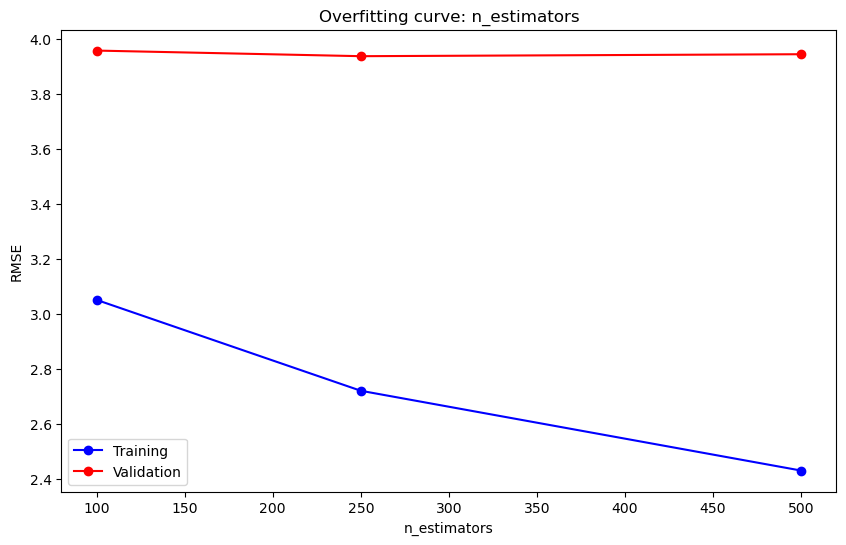

In [70]:
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

In [71]:
best_params['n_estimators'] = 250

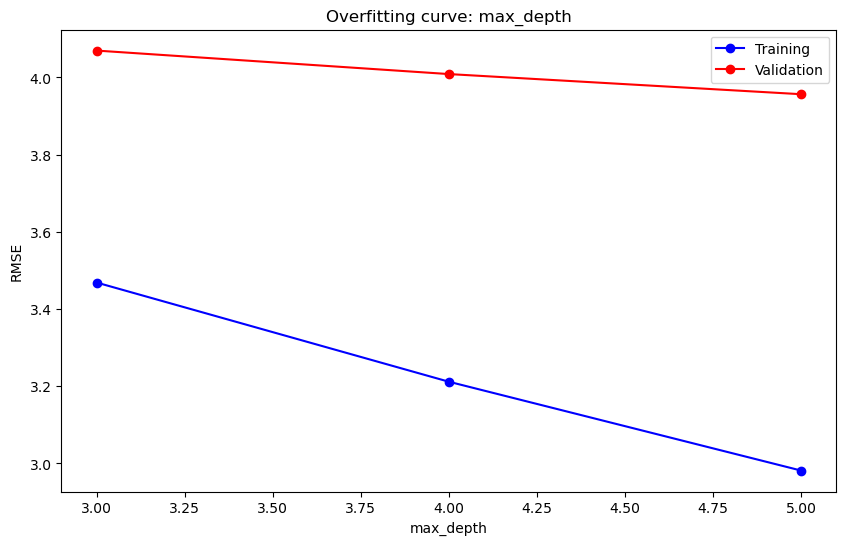

In [72]:
test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

In [73]:
best_params['max_depth'] = 5

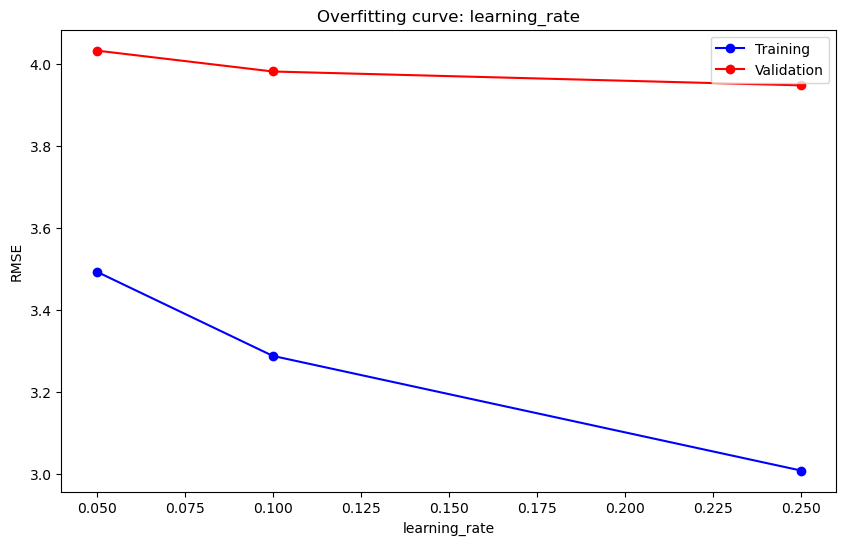

In [74]:
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

In [75]:
best_params['learning_rate'] = 0.25

In [76]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8)

In [77]:
xgb_model_final.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [78]:
evaluate(xgb_model_final)

(3.1072218,
 3.9705265,
 array([ 6.3305345,  7.389062 ,  9.786722 , ..., 11.402977 ,  8.890412 ,
        10.340432 ], dtype=float32),
 array([14.570231,  6.216066, 47.995094, ...,  7.648021, 30.345114,
         8.877279], dtype=float32))

In [79]:
predict_and_submit(xgb_model_final, 'xgb_tuned_submission.csv')

In [82]:
#xgb_model_final

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)